In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random
from scipy import ndarray
import skimage as sk
import skimage.io
from skimage import transform
from skimage import util

In [2]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))"""

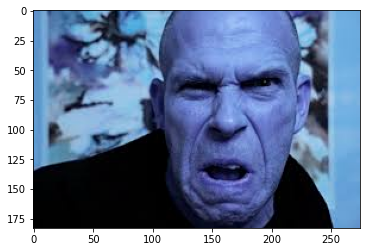

In [3]:
img = cv2.imread("angry2.jpg")
plt.imshow(img)

In [4]:
Datadirectory = "./data3/train/"
Datavalidate = "./data3/test/"

In [5]:
Classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

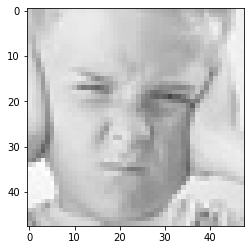

In [6]:
for cat in Classes:
    path = os.path.join(Datadirectory, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

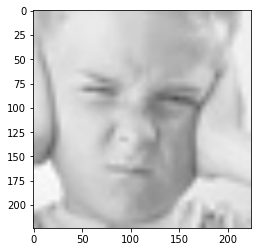

(224, 224, 3)

In [7]:
img_size = 224
new_array  = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()
new_array.shape

In [8]:
#Creation of three functions which will create additional data
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [9]:
training_Data = []  #data used to train the model
def create_training_Data():
    for cat in Classes:
        print(cat)
        print(type(cat))
        path = os.path.join(Datadirectory, cat)
        class_num = Classes.index(cat)
        for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path,img))
                new_array  = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
                if cat == "disgust":
                  #to_modify = sk.io.imread(os.path.join(path,img))

                  #modif_array = cv2.resize(to_modify, (img_size, img_size))
                  modif_array = new_array[:]
                  img_modified = random_rotation(modif_array)
                  plt.imshow(img_modified)
                  #img_modified  = cv2.resize(to_modify, (img_size, img_size))
                  training_Data.append([img_modified,class_num])

                  img_modified = random_rotation(modif_array)
                  #img_modified  = cv2.resize(to_modify, (img_size, img_size))
                  training_Data.append([img_modified,class_num])

                  img_modified = random_noise(new_array)
                  #img_modified  = cv2.resize(to_modify, (img_size, img_size))
                  training_Data.append([img_modified,class_num])
                  print(img_modified.shape)

                  img_modified = horizontal_flip(new_array)
                  #img_modified  = cv2.resize(to_modify, (img_size, img_size))
                  training_Data.append([img_modified,class_num])

In [10]:
validating_Data = []
def create_validating_Data():
    for cat in Classes:
        
        path = os.path.join(Datavalidate, cat)
        class_num = Classes.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array  = cv2.resize(img_array, (img_size, img_size))
                validating_Data.append([new_array,class_num])
            except Exception as e:
                pass

angry
<class 'str'>
disgust
<class 'str'>
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

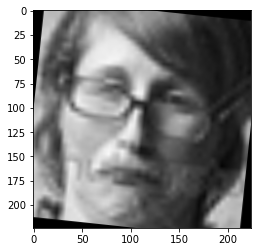

In [11]:
create_training_Data()
create_validating_Data()
print(len(training_Data))  # Au départ 12309 fichier dans train, puis 14053 donc 4*436 fichier disgust en plus
print(len(validating_Data))

In [12]:
random.shuffle(training_Data)
random.shuffle(validating_Data)

In [13]:
X= []
y = []
X_v = []
y_v = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
for features,label in validating_Data:
    X_v.append(features)
    y_v.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3)  #convert it to 4 dimensions
Y = np.array(y)
Y_v = np.array(y_v)
X_v = np.array(X_v).reshape(-1,img_size,img_size,3)  #convert it to 4 dimensions

In [14]:
X = X/255.0;  #normalize
X_v = X_v/255.0;

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)



In [17]:
model = tf.keras.applications.MobileNetV2()  #pre trained model
model.trainable = False

In [18]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [19]:
base_input  = model.layers[0].input

In [20]:
base_output = model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [21]:
final_output  = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dropout(0.3)(final_output)
final_output = layers.BatchNormalization()(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dropout(0.3)(final_output)
final_output = layers.BatchNormalization()(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [22]:
new_model  = keras.Model(inputs = base_input, outputs = final_output)

In [23]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [24]:
#with tf.device('/device:GPU:0'):
new_model.fit(X, Y, validation_data=(X_v, Y_v), epochs = 15,batch_size = 32,callbacks=[early_stopping],verbose=1,)

Epoch 1/15
158/158 [==============================] - 156s 953ms/step - loss: 1.9097 - accuracy: 0.3148 - val_loss: 1.7220 - val_accuracy: 0.3393
Epoch 2/15
158/158 [==============================] - 139s 882ms/step - loss: 1.5185 - accuracy: 0.4286 - val_loss: 1.7051 - val_accuracy: 0.3058
Epoch 3/15
158/158 [==============================] - 130s 825ms/step - loss: 1.4131 - accuracy: 0.4551 - val_loss: 1.6688 - val_accuracy: 0.3565
Epoch 4/15
158/158 [==============================] - 128s 811ms/step - loss: 1.3774 - accuracy: 0.4708 - val_loss: 1.6314 - val_accuracy: 0.3758
Epoch 5/15
158/158 [==============================] - 136s 864ms/step - loss: 1.3444 - accuracy: 0.4991 - val_loss: 1.5554 - val_accuracy: 0.4151
Epoch 6/15
158/158 [==============================] - 134s 847ms/step - loss: 1.3395 - accuracy: 0.4911 - val_loss: 1.6781 - val_accuracy: 0.3335
Epoch 7/15
158/158 [==============================] - 141s 894ms/step - loss: 1.3248 - accuracy: 0.5054 - val_loss: 1.5204 -

In [25]:
new_model.save('my_model_with_important_data2')

INFO:tensorflow:Assets written to: my_model_with_important_data2\assets


In [26]:
test = tf.keras.models.load_model('my_model_with_important_data2')